# Laboratorio 6 - Analisis de Paquetes de Red

### Oscar Fernando López Barrios
### Carné 20679

1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.
2. Convierta la variable a un DataFrame

In [92]:
from scapy.all import *
import pandas as pd
import numpy as np 
import binascii
import seaborn as sns
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP
import matplotlib.pyplot as plt

In [93]:
num_of_packets_to_sniff = 10
pcap = sniff(count=num_of_packets_to_sniff)

print(type(pcap))
print(len(pcap))
print(pcap)
pcap[0]

<class 'scapy.plist.PacketList'>
10
<Sniffed: TCP:2 UDP:8 ICMP:0 Other:0>


<Ether  dst=94:e6:f7:a6:6f:d5 src=e8:ed:d6:f6:c5:f5 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=246 id=3462 flags=DF frag=0 ttl=51 proto=udp chksum=0x362f src=66.22.231.47 dst=192.168.25.84 |<UDP  sport=50002 dport=64532 len=226 chksum=0x58e1 |<Raw  load="\\x90x\\xed\\xc7T\\xaa\\x83\\xb2\x00\x00\x7f\\xc1\\xbe\\xde\x00\x01(b\\xeb\\xa7\\xd4\\xcf\x03{*\\xd1ܴ\x0b\\x95\\xb3\x1dg\n\\xb7\\x8b\\xb7p\\xc0\\xd9X\x1a\\xf5\\xbc\\xbbj;4\\xe3 \\xb9\x01\x15\nV\\xc2ū\\x88\x12\\x87\x10\\xf7_\x1b\\xd4Ǵ|S\\xf1\\xe6\x01ӭ/X2!,\\x82\x1e\\xee\\xcf\x01\x0507\x15F\x1a\\xa4\x1f\x12\\xa1\\xcb+A\x10y\\xc71H\\x8b\x00\\xde?\\xc2x|v\\x8e\\xb4\\x9fi⍌\\xd5u\\x9d\x02\\x8a\\xcc2r\\x84П\\xd0:\\xd5\\xe1%\\x8e\\xd4\x12\x19\x15\x10\\xf1\\xa1^\\xbeh\\x88ܯ\x116\x04D\x18~6JA6\\xab\\x8aM\\xa9'\\x92\\xc8\x06\\x9a\\xefF\\\\xe3\\xc3\\xc8#\\xab\\xd4\\xf2잀E\\xfb\\xe0K6\x07*\\xc6=\\xe0\\xca'n\x078\\xa1\\xe1K̙\\xc1o\x1a\\xb1>\\xc7h^\\x93\\xa0\\x9e\\x86)n\\xdf\\xe9\x00\x00" |>>>>

In [94]:
ethernet_frame = pcap[0]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload

print("Informacion del frame:")
print(ethernet_frame.summary())

print("Informacion del paquete:")
print(ip_packet.summary())

print("Informacion del segmento:")
print(segment.summary())

print("Data:")
print(data.summary())

ethernet_frame.show()
data.show()

Informacion del frame:
Ether / IP / UDP 66.22.231.47:50002 > 192.168.25.84:64532 / Raw
Informacion del paquete:
IP / UDP 66.22.231.47:50002 > 192.168.25.84:64532 / Raw
Informacion del segmento:
UDP 66.22.231.47:50002 > 192.168.25.84:64532 / Raw
Data:
Raw
###[ Ethernet ]### 
  dst       = 94:e6:f7:a6:6f:d5
  src       = e8:ed:d6:f6:c5:f5
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 246
     id        = 3462
     flags     = DF
     frag      = 0
     ttl       = 51
     proto     = udp
     chksum    = 0x362f
     src       = 66.22.231.47
     dst       = 192.168.25.84
     \options   \
###[ UDP ]### 
        sport     = 50002
        dport     = 64532
        len       = 226
        chksum    = 0x58e1
###[ Raw ]### 
           load      = "\\x90x\\xed\\xc7T\\xaa\\x83\\xb2\x00\x00\x7f\\xc1\\xbe\\xde\x00\x01(b\\xeb\\xa7\\xd4\\xcf\x03{*\\xd1ܴ\x0b\\x95\\xb3\x1dg\n\\xb7\\x8b\\xb7p\\xc0\\xd9X\x1a\\xf5\\xbc\\xbbj;4\\xe3 \\xb9\x01

In [95]:
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)
print("Ethernet",pcap[ethernet_type])
print("IP", pcap[ip_type])
print("TCP", pcap[tcp_type])

print("UDP", pcap[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.UDP'>
Ethernet <Ether from Sniffed: TCP:2 UDP:8 ICMP:0 Other:0>
IP <IP from Sniffed: TCP:2 UDP:8 ICMP:0 Other:0>
TCP <UDP from Sniffed: TCP:0 UDP:8 ICMP:0 Other:0>
UDP <UDP from Sniffed: TCP:0 UDP:8 ICMP:0 Other:0>


In [96]:
pcap_file = "analisis_paquetes.pcap"
packets = rdpcap(pcap_file)

3. Muestre el contenido de las primeras 5 filas del dataset

In [97]:
data = []
for packet in packets:
    if IP in packet:
        ip_src = packet[IP].src
        ip_dst = packet[IP].dst
        proto = packet[IP].proto
        len_payload = len(packet.payload)
        data.append([ip_src, ip_dst, proto, len_payload])

columns = ['src', 'dst', 'proto', 'len_payload']
dataframe = pd.DataFrame(data, columns=columns)

print(dataframe.head())

           src          dst  proto  len_payload
0   10.1.10.53  84.54.22.33     17          961
1  84.54.22.33   10.1.10.53     17           84
2   10.1.10.53  84.54.22.33     17          975
3  84.54.22.33   10.1.10.53     17           84
4   10.1.10.53  84.54.22.33     17         1012


4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port
5. Estadísticas

In [98]:
dataframe

,src,dst,proto,len_payload
0,10.1.10.53,84.54.22.33,17,961
1,84.54.22.33,10.1.10.53,17,84
2,10.1.10.53,84.54.22.33,17,975
3,84.54.22.33,10.1.10.53,17,84
4,10.1.10.53,84.54.22.33,17,1012
...,...,...,...,...
57,84.54.22.33,10.1.10.53,17,84
58,10.1.10.53,84.54.22.33,17,969
59,84.54.22.33,10.1.10.53,17,84
60,10.1.10.53,84.54.22.33,17,588


In [99]:
print("Dirección Destino más frecuente")
print(dataframe['src'].describe(),'\n\n')

Dirección Destino más frecuente
count             62
unique             3
top       10.1.10.53
freq              31
Name: src, dtype: object 




In [100]:
print("IP más frecuente:")
frequent_address = dataframe['src'].describe()['top']
print(frequent_address)

print(dataframe[dataframe['src'] == frequent_address]['dst'].unique())

IP más frecuente:
10.1.10.53
['84.54.22.33' '75.75.75.75']


6. Gráficas

In [101]:
sum_payloads_by_src_ip = dataframe.groupby('src')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_src_ip.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IP de Origen')
plt.title('Suma de Payloads desde IP de Origen')
plt.show()

KeyError: 'Column not found: payload'

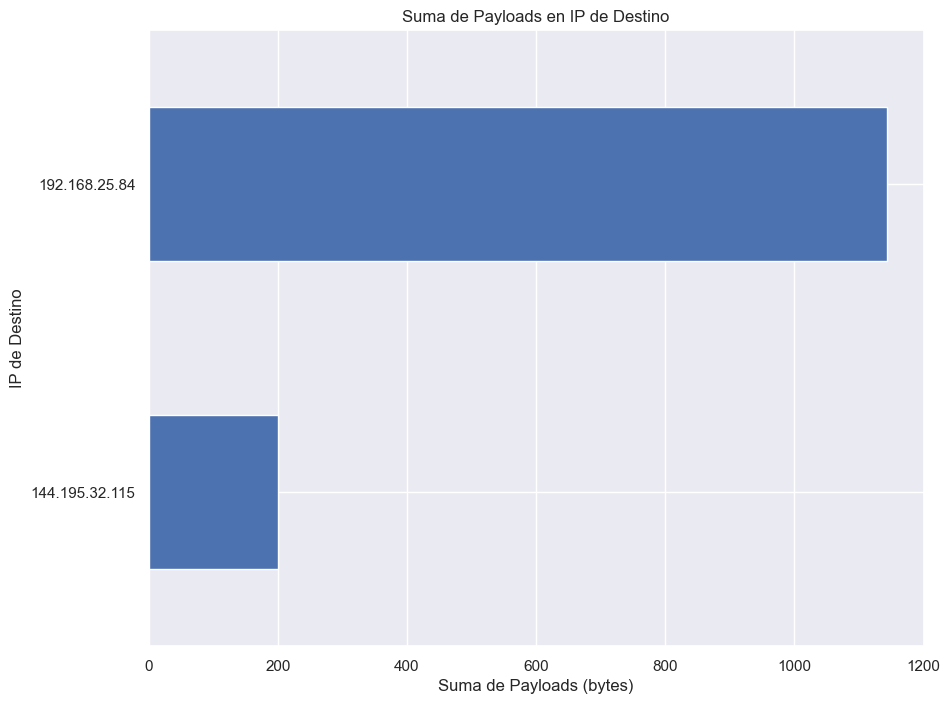

In [ ]:
sum_payloads_by_dst_ip = dataframe.groupby('dst')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_dst_ip.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IP de Destino')
plt.title('Suma de Payloads en IP de Destino')
plt.show()

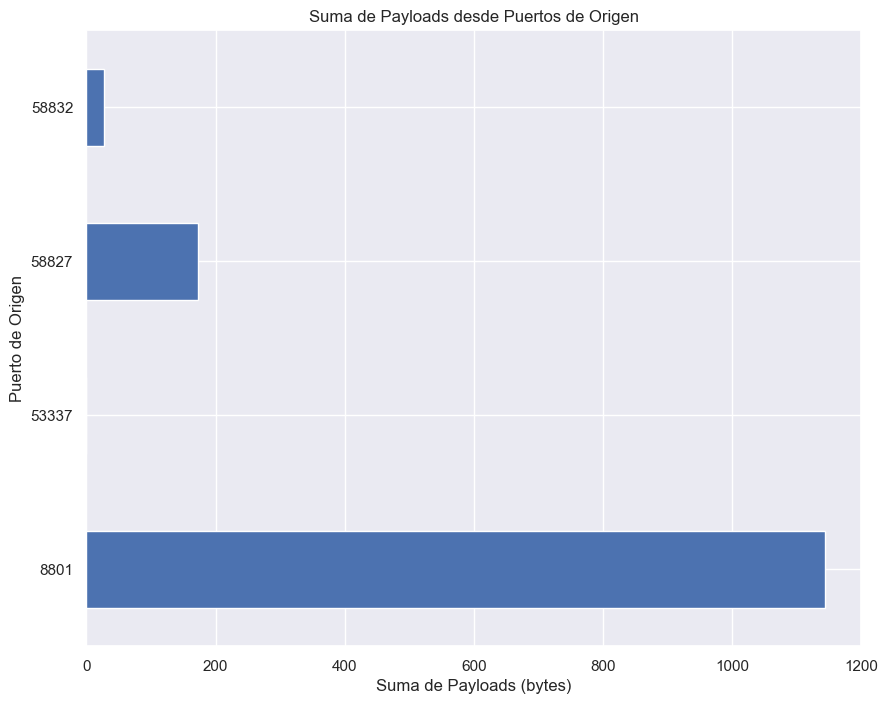

In [ ]:
sum_payloads_by_src_port = dataframe.groupby('sport')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_src_port.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puerto de Origen')
plt.title('Suma de Payloads desde Puertos de Origen')
plt.show()

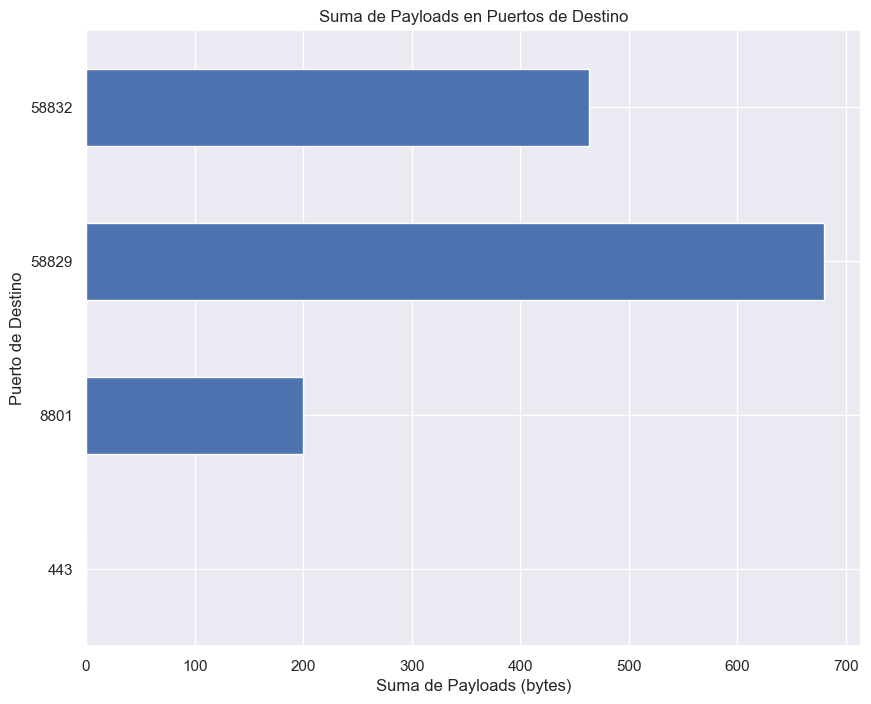

In [ ]:
sum_payloads_by_dst_port = dataframe.groupby('dport')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_dst_port.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puerto de Destino')
plt.title('Suma de Payloads en Puertos de Destino')
plt.show()

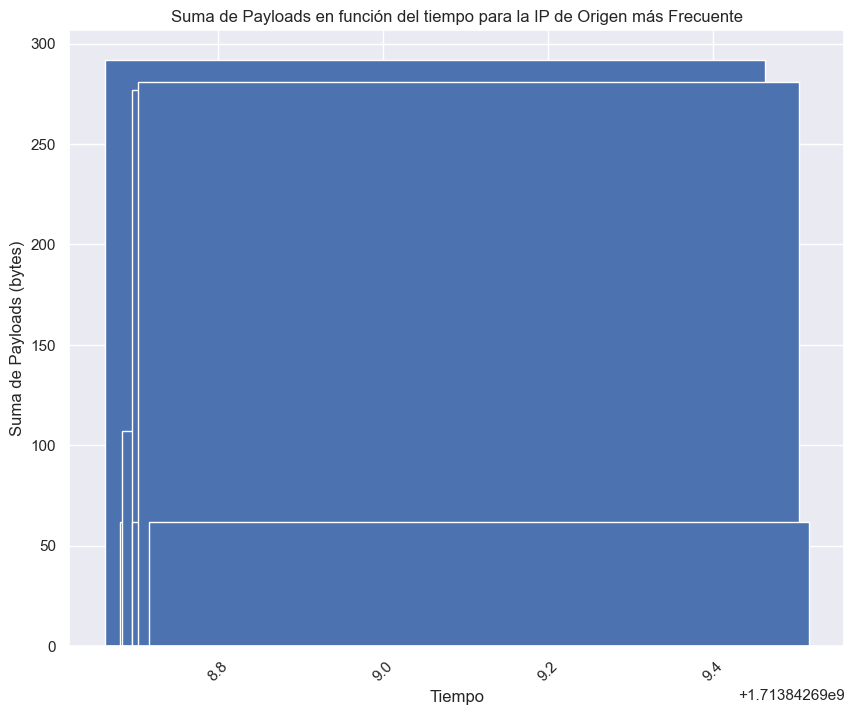

In [ ]:
frequent_src_ip_data = dataframe[dataframe['src'] == frequent_address]

plt.figure(figsize=(10, 8))
plt.bar(frequent_src_ip_data['time'], frequent_src_ip_data['payload'])
plt.xlabel('Tiempo')
plt.ylabel('Suma de Payloads (bytes)')
plt.title('Suma de Payloads en función del tiempo para la IP de Origen más Frecuente')
plt.xticks(rotation=45)
plt.show()

7. Investigación del Payload

In [ ]:
frequent_src_ip_df = dataframe[dataframe['src'] == frequent_address]
grouped_dst_payload_df = frequent_src_ip_df.groupby('dst')['payload'].sum().reset_index()
suspicious_dst_ip = grouped_dst_payload_df.loc[grouped_dst_payload_df['payload'].idxmax()]['dst']
suspicious_conversation_df = frequent_src_ip_df[frequent_src_ip_df['dst'] == suspicious_dst_ip]
payloads_array = suspicious_conversation_df['payload'].to_numpy()

In [ ]:
payloads_array

array([292, 62, 107, 277, 62, 281, 62], dtype=object)

In [ ]:
for payload in payloads_array:
    print(str(payload)[:10])

292
62
107
277
62
281
62
